In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickfleith/nasa-battery-dataset")

print("Path to dataset files:", path)

100%|██████████| 228M/228M [00:03<00:00, 68.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2


In [2]:
import os

print("Dataset path:", path)
print("Files inside:")
print(os.listdir(path))

Dataset path: /root/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2
Files inside:
['cleaned_dataset']


In [3]:
inner_path = os.path.join(path, "cleaned_dataset")
print("Files inside cleaned_dataset:")
print(os.listdir(inner_path))

Files inside cleaned_dataset:
['metadata.csv', 'extra_infos', 'data']


In [4]:
import pandas as pd

meta_path = os.path.join(path, "cleaned_dataset", "metadata.csv")
meta = pd.read_csv(meta_path)

print(meta.head())
print(meta.info())

        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                  NaN  
1                 NaN  0.05605783343888099  0.20097016584458333  
2                 NaN     

In [5]:
df = meta.copy()
df_dis = df[df["type"] == "discharge"]

print(df_dis.head())
print(df_dis.groupby("battery_id")["Capacity"].count())

         type                                         start_time  \
0   discharge  [2010.       7.      21.      15.       0.    ...   
4   discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   
6   discharge  [2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...   
8   discharge  [2010.       7.      22.       6.      16.    ...   
10  discharge  [2010.       7.      22.      10.      51.    ...   

    ambient_temperature battery_id  test_id  uid   filename  \
0                     4      B0047        0    1  00001.csv   
4                     4      B0047        4    5  00005.csv   
6                     4      B0047        6    7  00007.csv   
8                     4      B0047        8    9  00009.csv   
10                    4      B0047       10   11  00011.csv   

              Capacity   Re  Rct  
0   1.6743047446975208  NaN  NaN  
4   1.5243662105099023  NaN  NaN  
6   1.5080762969973425  NaN  NaN  
8   1.4835577960067696  NaN  NaN  
10  1.4671391666146525  NaN  NaN  
ba

In [6]:
import pandas as pd
import os

data_dir = os.path.join(path, "cleaned_dataset", "data")

sample_file = os.path.join(data_dir, "00001.csv")
sample_df = pd.read_csv(sample_file)

print(sample_df.head())
print(sample_df.info())

   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277         -0.995093              6.250255        1.0000   
3          4.019506         -0.996731              6.302176        1.0000   
4          4.004763         -0.992845              6.361645        1.0000   

   Voltage_load    Time  
0         0.000   0.000  
1         4.262   9.360  
2         3.465  23.281  
3         3.451  36.406  
4         3.438  49.625  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      490 non-null    float64
 1   Current_measured      490 non-null    float64
 2   Temperature_measured  490 non-null    float64
 3   Current_load     

In [7]:
import pandas as pd
import numpy as np
import os

meta_path = os.path.join(path, "cleaned_dataset", "metadata.csv")
meta = pd.read_csv(meta_path)

meta_dis = meta[meta["type"] == "discharge"].copy()

def clean_capacity(x):
    if x in ["[]", "", "nan", "None", None]:
        return np.nan
    return x

meta_dis["Capacity"] = meta_dis["Capacity"].apply(clean_capacity)

meta_dis["Capacity"] = pd.to_numeric(meta_dis["Capacity"], errors="coerce")

meta_dis = meta_dis.dropna(subset=["Capacity"]).copy()

meta_dis.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.674305,NaN,NaN
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.524366,NaN,NaN
6,discharge,[2.010e+03 7.000e+00 2.200e+01 1.000e+00 4.000...,4,B0047,6,7,00007.csv,1.508076,NaN,NaN
8,discharge,[2010. 7. 22. 6. 16. ...,4,B0047,8,9,00009.csv,1.483558,NaN,NaN
10,discharge,[2010. 7. 22. 10. 51. ...,4,B0047,10,11,00011.csv,1.467139,NaN,NaN


In [8]:
import numpy as np
import pandas as pd
import os

meta_dis = meta_dis.sort_values(["battery_id", "test_id"])

X_list = []
y_list = []
bat_list = []
test_list = []

data_dir = os.path.join(path, "cleaned_dataset", "data")

for idx, row in meta_dis.iterrows():
    file = os.path.join(data_dir, row["filename"])
    if not os.path.exists(file):
        continue

    df = pd.read_csv(file)
    seq = df.values.astype(float)   # shape: (T, 6)

    X_list.append(seq)
    y_list.append(row["Capacity"])
    bat_list.append(row["battery_id"])
    test_list.append(row["test_id"])

X = X_list
y = np.array(y_list)

In [9]:
feature_rows = []

for idx, row in meta_dis.iterrows():
    f = os.path.join(data_dir, row["filename"])
    if not os.path.exists(f):
        continue

    df = pd.read_csv(f)

    V = df["Voltage_measured"].values
    I = df["Current_measured"].values
    T = df["Temperature_measured"].values
    time = df["Time"].values

    # --- static degradation features ---
    feat = {
        "battery_id": row["battery_id"],
        "cycle": row["test_id"],
        "capacity": row["Capacity"],  # SOH
        "dur": time[-1] - time[0],  # discharge duration
        "v_mean": V.mean(),
        "v_min": V.min(),
        "v_max": V.max(),
        "i_mean": I.mean(),
        "t_mean": T.mean(),
        "t_max": T.max(),
        # voltage slope (coarse degradation shape)
        "v_slope": V[int(len(V)*0.9)] - V[int(len(V)*0.1)],
    }

    feature_rows.append(feat)

feat_df = pd.DataFrame(feature_rows)
feat_df.head()

,battery_id,cycle,capacity,dur,v_mean,v_min,v_max,i_mean,t_mean,t_max,v_slope
0,B0005,1,1.856487,3690.234,3.529829,2.612467,4.191492,-1.818702,32.572328,38.982181,-0.949879
1,B0005,3,1.846327,3672.344,3.537320,2.587209,4.189773,-1.817560,32.725235,39.033398,-0.944226
2,B0005,5,1.835349,3651.641,3.543737,2.651917,4.188187,-1.816487,32.642862,38.818797,-0.906856
3,B0005,7,1.835263,3631.563,3.543666,2.592948,4.188461,-1.825589,32.514876,38.762305,-0.848461
4,B0005,9,1.834646,3629.172,3.542343,2.547420,4.188299,-1.826114,32.382349,38.665393,-0.861731


In [10]:
rul_list = []

for bid, group in feat_df.groupby("battery_id"):
    group = group.sort_values("cycle")
    cap0 = group["capacity"].iloc[0]          # initial capacity
    threshold = 0.8 * cap0                    # 80% EOL

    eol_cycle = group[group["capacity"] < threshold]["cycle"]
    if len(eol_cycle) == 0:
        eol_c = group["cycle"].max()
    else:
        eol_c = eol_cycle.iloc[0]

    for _, row in group.iterrows():
        rul = eol_c - row["cycle"]
        rul_list.append(rul)

feat_df["RUL"] = rul_list
feat_df.head()

,battery_id,cycle,capacity,dur,v_mean,v_min,v_max,i_mean,t_mean,t_max,v_slope,RUL
0,B0005,1,1.856487,3690.234,3.529829,2.612467,4.191492,-1.818702,32.572328,38.982181,-0.949879,354
1,B0005,3,1.846327,3672.344,3.537320,2.587209,4.189773,-1.817560,32.725235,39.033398,-0.944226,352
2,B0005,5,1.835349,3651.641,3.543737,2.651917,4.188187,-1.816487,32.642862,38.818797,-0.906856,350
3,B0005,7,1.835263,3631.563,3.543666,2.592948,4.188461,-1.825589,32.514876,38.762305,-0.848461,348
4,B0005,9,1.834646,3629.172,3.542343,2.547420,4.188299,-1.826114,32.382349,38.665393,-0.861731,346


In [11]:
from sklearn.model_selection import train_test_split

bats = feat_df["battery_id"].unique()
train_bats, test_bats = train_test_split(bats, test_size=0.2, random_state=42)

train_df = feat_df[feat_df["battery_id"].isin(train_bats)]
test_df  = feat_df[feat_df["battery_id"].isin(test_bats)]

feature_cols = ["dur","v_mean","v_min","v_max","i_mean","t_mean","t_max","v_slope","capacity"]
X_train = train_df[feature_cols].values
y_train = train_df["RUL"].values

X_test  = test_df[feature_cols].values
y_test  = test_df["RUL"].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def eval_model(name, model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"{name}: MAE={mae:.3f}, RMSE={rmse:.3f}")
    return mae, rmse


print("=== Baseline Model Performance ===")

# 1. Linear Regression
eval_model("Linear Regression", LinearRegression())

# 2. Random Forest
eval_model("Random Forest", RandomForestRegressor(n_estimators=200, random_state=42))

# 3. SVR (RBF kernel)
eval_model("SVR", SVR(kernel="rbf", C=10, gamma="scale"))

# 4. Gaussian Process Regression
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)
eval_model("GPR", GaussianProcessRegressor(kernel=kernel, alpha=1e-2))

=== Baseline Model Performance ===
Linear Regression: MAE=121.003, RMSE=150.839
Random Forest: MAE=105.284, RMSE=134.557
SVR: MAE=107.876, RMSE=127.172


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GPR: MAE=87.063, RMSE=113.629


(87.06293706293707, np.float64(113.6287661795925))

In [ ]:
# =========================
# Baselines + Nonlinear Tuning (SVR/GPR)
# RandomizedSearchCV version (FASTER GPR)
# - Keep everything else the same
# - Only speed up the GPR kernel-sensitivity randomized tuning
# =========================

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF, ConstantKernel, Matern, RationalQuadratic, WhiteKernel
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.stats import loguniform


# -------------------------
# Utility: baseline eval (no tuning)
# -------------------------
def eval_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    print(f"{name}: MAE={mae:.3f}, RMSE={rmse:.3f}")
    return mae, rmse


# -------------------------
# Utility: tuned eval (with RandomizedSearchCV)
# -------------------------
def eval_best_model(name, search_obj, X_train, y_train, X_test, y_test):
    search_obj.fit(X_train, y_train)
    best_model = search_obj.best_estimator_

    pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    print(f"{name}: MAE={mae:.3f}, RMSE={rmse:.3f}")
    print(f"  Best params: {search_obj.best_params_}")
    print(f"  Best CV score (neg MAE): {search_obj.best_score_:.4f}")

    return mae, rmse, best_model


# -------------------------
# GPR: Kernel sensitivity + Randomized tuning (FASTER)
# -------------------------
def tune_gpr_over_kernels(X_train, y_train, X_test, y_test, kernels):
    """
    Speed optimizations (minimal-impact):
      - cv: 5 -> 3
      - n_iter: 20 -> 8
      - n_restarts_optimizer: fixed to 0 (removed from search space)
      - n_jobs: -1 -> 2 (avoids memory thrash / oversubscription)
    """
    results = []

    for k_idx, kernel in enumerate(kernels):
        gpr_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("gpr", GaussianProcessRegressor(
                kernel=kernel,
                random_state=42,
                n_restarts_optimizer=0  # IMPORTANT: fixed for speed
            ))
        ])

        gpr_param_dist = {
            "gpr__alpha": loguniform(1e-6, 1e-1),
            "gpr__normalize_y": [True, False],
        }

        gpr_search = RandomizedSearchCV(
            estimator=gpr_pipe,
            param_distributions=gpr_param_dist,
            n_iter=8,                         # was 20
            scoring="neg_mean_absolute_error",
            cv=3,                             # was 5
            random_state=42,
            n_jobs=2                           # was -1
        )

        mae, rmse, best_model = eval_best_model(
            f"GPR (kernel #{k_idx+1})",
            gpr_search,
            X_train, y_train, X_test, y_test
        )

        results.append({
            "kernel_index": k_idx + 1,
            "kernel_repr": str(kernel),
            "mae": mae,
            "rmse": rmse,
            "best_params": gpr_search.best_params_,
            "best_model": best_model
        })

    results = sorted(results, key=lambda d: d["mae"])

    print("\n=== GPR Kernel Sensitivity Summary (sorted by MAE) ===")
    for r in results:
        print(f"kernel#{r['kernel_index']} MAE={r['mae']:.3f}, RMSE={r['rmse']:.3f}")
        print(f"  kernel: {r['kernel_repr']}")
        print(f"  best_params: {r['best_params']}")

    return results


# =========================
# MAIN
# Assumes X_train, X_test, y_train, y_test already exist
# =========================

print("=== Baseline Model Performance ===")

# 1) Linear Regression
eval_model(
    "Linear Regression",
    LinearRegression(),
    X_train, y_train, X_test, y_test
)

# 2) Random Forest
eval_model(
    "Random Forest",
    RandomForestRegressor(n_estimators=200, random_state=42),
    X_train, y_train, X_test, y_test
)


print("\n=== SVR: Randomized Hyperparameter Tuning ===")

# 3) SVR tuned (unchanged)
svr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf"))
])

svr_param_dist = {
    "svr__C": loguniform(1e-2, 1e3),
    "svr__gamma": loguniform(1e-4, 1e0),
    "svr__epsilon": loguniform(1e-3, 1e-1),
}

svr_search = RandomizedSearchCV(
    estimator=svr_pipe,
    param_distributions=svr_param_dist,
    n_iter=30,
    scoring="neg_mean_absolute_error",
    cv=5,
    random_state=42,
    n_jobs=-1
)

mae_svr, rmse_svr, best_svr = eval_best_model(
    "SVR (tuned via RandomizedSearchCV)",
    svr_search,
    X_train, y_train, X_test, y_test
)


print("\n=== GPR: Kernel Sensitivity + Randomized Tuning (FASTER) ===")

# Kernel candidates unchanged
kernel_candidates = [
    ConstantKernel(1.0) * RBF(length_scale=1.0),
    ConstantKernel(1.0) * Matern(length_scale=1.0, nu=1.5),
    ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5),
    ConstantKernel(1.0) * RationalQuadratic(length_scale=1.0, alpha=1.0),
    ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-2),
]

gpr_results = tune_gpr_over_kernels(
    X_train, y_train, X_test, y_test, kernel_candidates
)

best_gpr = gpr_results[0]["best_model"]

print("\n=== Best Nonlinear Models Summary ===")
print(f"Best SVR -> MAE={mae_svr:.3f}, RMSE={rmse_svr:.3f}")
print(f"Best GPR -> MAE={gpr_results[0]['mae']:.3f}, RMSE={gpr_results[0]['rmse']:.3f}")
print(f"Best GPR kernel: {gpr_results[0]['kernel_repr']}")
print(f"Best GPR params: {gpr_results[0]['best_params']}")

=== Baseline Model Performance ===
Linear Regression: MAE=121.003, RMSE=150.839
Random Forest: MAE=105.284, RMSE=134.557

=== SVR: Randomized Hyperparameter Tuning ===
SVR (tuned via RandomizedSearchCV): MAE=109.373, RMSE=136.596
  Best params: {'svr__C': np.float64(34.70266988650411), 'svr__epsilon': np.float64(0.0010994335574766201), 'svr__gamma': np.float64(0.7579479953348001)}
  Best CV score (neg MAE): -102.4822

=== GPR: Kernel Sensitivity + Randomized Tuning (FASTER) ===
GPR (kernel #1): MAE=124.884, RMSE=152.813
  Best params: {'gpr__alpha': np.float64(0.0009846738873614568), 'gpr__normalize_y': True}
  Best CV score (neg MAE): -142.0259
GPR (kernel #2): MAE=120.015, RMSE=147.194
  Best params: {'gpr__alpha': np.float64(7.459343285726558e-05), 'gpr__normalize_y': True}
  Best CV score (neg MAE): -137.2194
GPR (kernel #3): MAE=115.958, RMSE=144.802
  Best params: {'gpr__alpha': np.float64(0.0009846738873614568), 'gpr__normalize_y': True}
  Best CV score (neg MAE): -141.6241
GPR 

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GPR (kernel #5): MAE=87.063, RMSE=113.629
  Best params: {'gpr__alpha': np.float64(8.26368871415801e-06), 'gpr__normalize_y': False}
  Best CV score (neg MAE): -142.1667

=== GPR Kernel Sensitivity Summary (sorted by MAE) ===
kernel#5 MAE=87.063, RMSE=113.629
  kernel: 1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=0.01)
  best_params: {'gpr__alpha': np.float64(8.26368871415801e-06), 'gpr__normalize_y': False}
kernel#3 MAE=115.958, RMSE=144.802
  kernel: 1**2 * Matern(length_scale=1, nu=2.5)
  best_params: {'gpr__alpha': np.float64(0.0009846738873614568), 'gpr__normalize_y': True}
kernel#4 MAE=116.394, RMSE=144.413
  kernel: 1**2 * RationalQuadratic(alpha=1, length_scale=1)
  best_params: {'gpr__alpha': np.float64(0.00016949768237884723), 'gpr__normalize_y': True}
kernel#2 MAE=120.015, RMSE=147.194
  kernel: 1**2 * Matern(length_scale=1, nu=1.5)
  best_params: {'gpr__alpha': np.float64(7.459343285726558e-05), 'gpr__normalize_y': True}
kernel#1 MAE=124.884, RMSE=152.813
  kernel: 

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


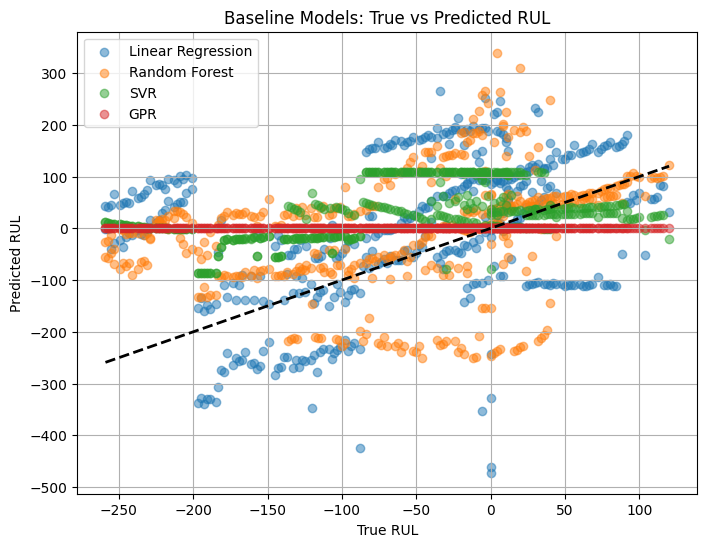

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test,
            LinearRegression().fit(X_train, y_train).predict(X_test),
            alpha=0.5, label="Linear Regression")

plt.scatter(y_test,
            RandomForestRegressor(n_estimators=200, random_state=42).fit(X_train,y_train).predict(X_test),
            alpha=0.5, label="Random Forest")

plt.scatter(y_test,
            SVR(C=10, kernel="rbf").fit(X_train,y_train).predict(X_test),
            alpha=0.5, label="SVR")

kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)
plt.scatter(y_test,
            GaussianProcessRegressor(kernel=kernel, alpha=1e-2).fit(X_train,y_train).predict(X_test),
            alpha=0.5, label="GPR")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2)

plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.legend()
plt.title("Baseline Models: True vs Predicted RUL")
plt.grid(True)
plt.show()

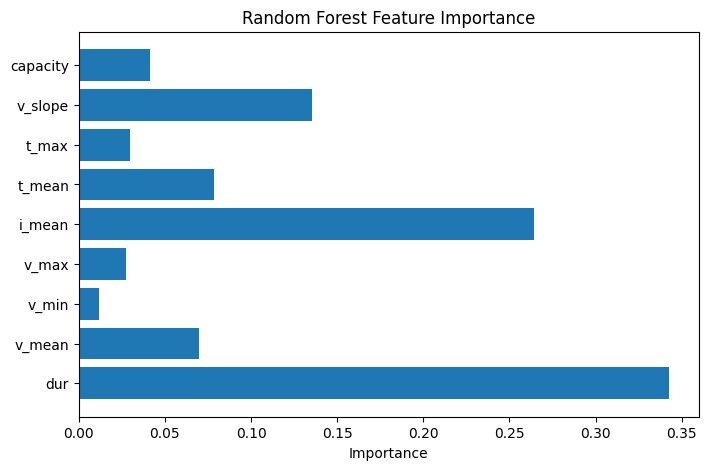

In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_names = feature_cols

plt.figure(figsize=(8,5))
plt.barh(feat_names, importances)
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
# ============================================
# 1. Load time-series sequences & compute RUL
# ============================================

import torch
import pandas as pd
import numpy as np
import os

seq_list = []
seq_rul_list = []

grouped = feat_df.groupby("battery_id")

for idx, row in meta_dis.iterrows():
    file_path = os.path.join(data_dir, row["filename"])
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path).astype(float)
    seq = torch.tensor(df.values, dtype=torch.float32)   # shape: (T, 6)

    # compute RUL
    battery = row["battery_id"]
    cycle   = row["test_id"]

    eol_cycle = grouped.get_group(battery)["cycle"].max()
    rul = eol_cycle - cycle

    seq_list.append(seq)
    seq_rul_list.append(rul)

print("Loaded sequences:", len(seq_list))


# ============================================
# 2. Pad sequences
# ============================================

from torch.nn.utils.rnn import pad_sequence

X_pad = pad_sequence(seq_list, batch_first=True)  # (N, T_max, 6)
y_rul = torch.tensor(seq_rul_list, dtype=torch.float32)


# ============================================
# 3. Train / Test split + DataLoader
# ============================================

from torch.utils.data import Dataset, DataLoader

class BatterySeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = BatterySeqDataset(X_pad, y_rul)

train_size = int(0.8 * len(dataset))
test_size  = len(dataset) - train_size

train_ds, test_ds = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)


# ============================================
# 4. LSTM Model
# ============================================

import torch.nn as nn

class LSTM_RUL(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        last = out[:, -1, :]  # last timestep
        return self.fc(last).squeeze()


# ============================================
# 5. Training Loop
# ============================================

model = LSTM_RUL()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

EPOCHS = 20

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {train_loss/len(train_loader):.4f}")


# ============================================
# 6. Evaluation (MAE & RMSE)
# ============================================

model.eval()
preds = []
trues = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        pred = model(X_batch)
        preds.extend(pred.numpy())
        trues.extend(y_batch.numpy())

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(trues, preds)
rmse = np.sqrt(mean_squared_error(trues, preds))
print("LSTM MAE:", mae)
print("LSTM RMSE:", rmse)


# ============================================
# 7. Plot LSTM Predictions
# ============================================

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(trues, preds, alpha=0.4)
plt.plot([min(trues), max(trues)], [min(trues), max(trues)], "k--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("LSTM RUL Prediction (Test Set)")
plt.grid(True)
plt.show()

Loaded sequences: 2769
Epoch 1/20, Loss: 49273.3771
Epoch 2/20, Loss: 47472.3894
Epoch 3/20, Loss: 46123.0835


KeyboardInterrupt: 

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


rul_map = {}
for _, row in feat_df.iterrows():
    key = (row["battery_id"], int(row["cycle"]))
    rul_map[key] = float(row["RUL"])


seq_list = []
rul_list = []
bat_list = []
cycle_list = []

for idx, row in meta_dis.iterrows():
    file_path = os.path.join(data_dir, row["filename"])
    if not os.path.exists(file_path):
        continue

    battery = row["battery_id"]
    cycle   = int(row["test_id"])
    key = (battery, cycle)
    if key not in rul_map:
        continue

    df_ts = pd.read_csv(file_path).astype(float)  # (T, 6)
    seq = torch.tensor(df_ts.values, dtype=torch.float32)

    seq_list.append(seq)
    rul_list.append(rul_map[key])
    bat_list.append(battery)
    cycle_list.append(cycle)

print("Total sequences for LSTM:", len(seq_list))


X_raw = pad_sequence(seq_list, batch_first=True)          # shape: (N, T_max, 6)
y_raw = torch.tensor(rul_list, dtype=torch.float32)       # shape: (N,)

# X_raw: (N, T, F)
feat_mean = X_raw.mean(dim=(0, 1), keepdim=True)  # (1,1,F)
feat_std  = X_raw.std(dim=(0, 1), keepdim=True)   # (1,1,F)
feat_std[feat_std == 0] = 1.0

X_norm = (X_raw - feat_mean) / feat_std

bats = np.array(bat_list)
unique_bats = np.unique(bats)
train_bats, test_bats = train_test_split(unique_bats, test_size=0.2, random_state=42)

train_idx = [i for i, b in enumerate(bats) if b in train_bats]
test_idx  = [i for i, b in enumerate(bats) if b in test_bats]

X_train_ts = X_norm[train_idx]
y_train_ts = y_raw[train_idx]
X_test_ts  = X_norm[test_idx]
y_test_ts  = y_raw[test_idx]

print("Train sequences:", len(train_idx))
print("Test sequences :", len(test_idx))

class BatterySeqDataset(Dataset):
    """Time-series dataset for RUL regression."""
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = BatterySeqDataset(X_train_ts, y_train_ts)
test_ds  = BatterySeqDataset(X_test_ts,  y_test_ts)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=32, shuffle=False)


class LSTM_RUL(nn.Module):
    """LSTM-based regressor for RUL."""
    def __init__(self, input_dim=6, hidden_dim=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: (B, T, F)
        out, _ = self.lstm(x)         # out: (B, T, H)
        last = out[:, -1, :]          # (B, H) use last timestep
        return self.fc(last).squeeze()  # (B,)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = LSTM_RUL().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

EPOCHS = 25

for epoch in range(EPOCHS):
    model.train()
    batch_losses = []

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    mse_epoch = float(np.mean(batch_losses))
    rmse_epoch = np.sqrt(mse_epoch)
    print(f"Epoch {epoch+1}/{EPOCHS}, MSE: {mse_epoch:.2f}, RMSE: {rmse_epoch:.2f}")


model.eval()
preds = []
trues = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        pred = model(X_batch)

        preds.extend(pred.cpu().numpy())
        trues.extend(y_batch.cpu().numpy())

mae = mean_absolute_error(trues, preds)
rmse = np.sqrt(mean_squared_error(trues, preds))
print("LSTM Test MAE:", mae)
print("LSTM Test RMSE:", rmse)


plt.figure(figsize=(6,6))
plt.scatter(trues, preds, alpha=0.4)
min_val = min(min(trues), min(preds))
max_val = max(max(trues), max(preds))
plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("LSTM RUL Prediction (Battery-level Split)")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os

# Part 1: Cycle-Level Feature Extraction
cycle_features = []

for idx, row in meta_dis.iterrows():
    f = os.path.join(data_dir, row["filename"])
    if not os.path.exists(f):
        continue

    df = pd.read_csv(f).astype(float)
    V = df["Voltage_measured"].values
    I = df["Current_measured"].values
    T = df["Temperature_measured"].values
    time = df["Time"].values

    # dV/dt calculation
    dVdt = np.gradient(V, time)

    feat = {
        "battery_id": row["battery_id"],
        "cycle": int(row["test_id"]),
        "capacity": float(row["Capacity"]),
        "duration": time[-1] - time[0],
        "V_mean": V.mean(),
        "V_min": V.min(),
        "V_max": V.max(),
        "V_slope": V[int(0.9 * len(V))] - V[int(0.1 * len(V))],
        "dVdt_mean": dVdt.mean(),
        "dVdt_max": dVdt.max(),
        "T_mean": T.mean(),
        "T_max": T.max(),
        "I_mean": I.mean(),
    }

    cycle_features.append(feat)

# Create DataFrame
feat_df_full = pd.DataFrame(cycle_features)

# Part 1.2: Compute RUL using 80% capacity threshold
rul_list = []
for bid, group in feat_df_full.groupby("battery_id"):
    group = group.sort_values("cycle")
    cap0 = group["capacity"].iloc[0]
    threshold = 0.8 * cap0

    # find EOL cycle
    eol_cycles = group[group["capacity"] < threshold]["cycle"]
    if len(eol_cycles) == 0:
        eol = group["cycle"].max()
    else:
        eol = eol_cycles.iloc[0]

    # compute RUL
    for _, r in group.iterrows():
        rul_list.append(eol - r["cycle"])

feat_df_full["RUL"] = rul_list

print("Feature extraction complete! Shape:", feat_df_full.shape)
feat_df_full.head()

Feature extraction complete! Shape: (2769, 14)


,battery_id,cycle,capacity,duration,V_mean,V_min,V_max,V_slope,dVdt_mean,dVdt_max,T_mean,T_max,I_mean,RUL
0,B0005,1,1.856487,3690.234,3.529829,2.612467,4.191492,-0.949879,-0.000249,0.011539,32.572328,38.982181,-1.818702,354
1,B0005,3,1.846327,3672.344,3.537320,2.587209,4.189773,-0.944226,-0.000244,0.012035,32.725235,39.033398,-1.817560,352
2,B0005,5,1.835349,3651.641,3.543737,2.651917,4.188187,-0.906856,-0.000237,0.011284,32.642862,38.818797,-1.816487,350
3,B0005,7,1.835263,3631.563,3.543666,2.592948,4.188461,-0.848461,-0.000240,0.012246,32.514876,38.762305,-1.825589,348
4,B0005,9,1.834646,3629.172,3.542343,2.547420,4.188299,-0.861731,-0.000244,0.012913,32.382349,38.665393,-1.826114,346


Total sequences: 2769
Epoch 1, Loss=34535.12
Epoch 2, Loss=33746.11
Epoch 3, Loss=33198.88
Epoch 4, Loss=32324.73
Epoch 5, Loss=31561.74
Epoch 6, Loss=30985.07
Epoch 7, Loss=31159.71
Epoch 8, Loss=30553.85
Epoch 9, Loss=30042.24
Epoch 10, Loss=30188.04
Epoch 11, Loss=29913.82
Epoch 12, Loss=30115.72
Epoch 13, Loss=29348.87
Epoch 14, Loss=28996.58
Epoch 15, Loss=29552.94
Epoch 16, Loss=28954.18
Epoch 17, Loss=28961.62
Epoch 18, Loss=28612.77
Epoch 19, Loss=28914.74
Epoch 20, Loss=28705.99
Epoch 1, Loss=34054.86
Epoch 2, Loss=33617.85
Epoch 3, Loss=33169.76
Epoch 4, Loss=31920.86
Epoch 5, Loss=31331.11
Epoch 6, Loss=30936.82
Epoch 7, Loss=30769.32
Epoch 8, Loss=30229.06
Epoch 9, Loss=29918.06
Epoch 10, Loss=30175.23
Epoch 11, Loss=30095.20
Epoch 12, Loss=29678.79
Epoch 13, Loss=29772.99
Epoch 14, Loss=29270.35
Epoch 15, Loss=28796.11
Epoch 16, Loss=28746.90
Epoch 17, Loss=28925.16
Epoch 18, Loss=28510.43
Epoch 19, Loss=28559.54
Epoch 20, Loss=28492.77


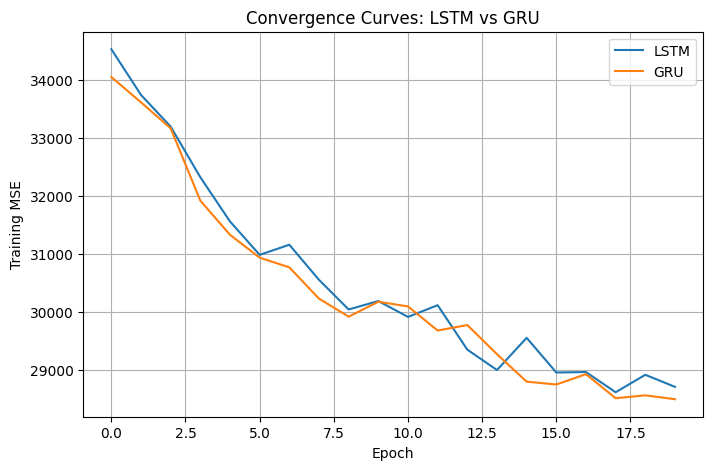

LSTM  → MAE: 130.61020500343162 RMSE: 159.0454045411514
GRU   → MAE: 130.69081860877972 RMSE: 159.12157472064993


In [ ]:
# ============================================
# Part 2: LSTM & GRU Training + Comparison
# ============================================

import torch
import numpy as np
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# ====== Build RUL map from Part 1 features ======
rul_map = {(r["battery_id"], int(r["cycle"])): r["RUL"] for _, r in feat_df_full.iterrows()}

# ====== Load sequences and align with RUL ======
seq_list, rul_list, bat_list, cycle_list = [], [], [], []

for idx, row in meta_dis.iterrows():
    f = os.path.join(data_dir, row["filename"])
    if not os.path.exists(f):
        continue

    battery = row["battery_id"]
    cycle = int(row["test_id"])

    if (battery, cycle) not in rul_map:
        continue

    df = pd.read_csv(f).astype(float)
    seq = torch.tensor(df.values, dtype=torch.float32)

    seq_list.append(seq)
    rul_list.append(rul_map[(battery, cycle)])
    bat_list.append(battery)
    cycle_list.append(cycle)

print("Total sequences:", len(seq_list))

# ====== Padding ======
X_raw = pad_sequence(seq_list, batch_first=True)
y_raw = torch.tensor(rul_list, dtype=torch.float32)

# ====== Feature normalization ======
mean = X_raw.mean(dim=(0,1), keepdim=True)
std  = X_raw.std(dim=(0,1), keepdim=True)
X_norm = (X_raw - mean) / (std + 1e-8)

# ====== Battery-level train/test split ======
bats = np.array(bat_list)
unique_bats = np.unique(bats)
train_bats, test_bats = train_test_split(unique_bats, test_size=0.2, random_state=42)

train_idx = [i for i, b in enumerate(bats) if b in train_bats]
test_idx  = [i for i, b in enumerate(bats) if b in test_bats]

X_train, y_train = X_norm[train_idx], y_raw[train_idx]
X_test,  y_test  = X_norm[test_idx], y_raw[test_idx]


# ====== Dataset class ======
class SeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(SeqDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader  = DataLoader(SeqDataset(X_test,  y_test),  batch_size=32, shuffle=False)


# ====== Models (LSTM / GRU) ======
class LSTM_RUL(nn.Module):
    def __init__(self, hidden_dim=64):
        super().__init__()
        self.lstm = nn.LSTM(6, hidden_dim, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out,_ = self.lstm(x)
        return self.fc(out[:,-1,:]).squeeze()

class GRU_RUL(nn.Module):
    def __init__(self, hidden_dim=64):
        super().__init__()
        self.gru = nn.GRU(6, hidden_dim, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out,_ = self.gru(x)
        return self.fc(out[:,-1,:]).squeeze()


# ====== Training function ======
def train_model(model, train_loader, epochs=20):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)
    opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        model.train()
        batch_losses = []
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            opt.zero_grad()
            pred = model(Xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            opt.step()
            batch_losses.append(loss.item())
        epoch_loss = np.mean(batch_losses)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}, Loss={epoch_loss:.2f}")
    return model, np.array(losses)


# ====== Train LSTM & GRU ======
lstm_model, lstm_losses = train_model(LSTM_RUL(), train_loader, epochs=20)
gru_model,  gru_losses  = train_model(GRU_RUL(),  train_loader, epochs=20)

# ====== Plot convergence curves ======
plt.figure(figsize=(8,5))
plt.plot(lstm_losses, label="LSTM")
plt.plot(gru_losses, label="GRU")
plt.xlabel("Epoch")
plt.ylabel("Training MSE")
plt.legend()
plt.title("Convergence Curves: LSTM vs GRU")
plt.grid()
plt.show()


# ====== Final evaluation ======
def evaluate(model):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for Xb, yb in test_loader:
            Xb = Xb.to(device)
            pred = model(Xb).cpu().numpy()
            preds.extend(pred)
            trues.extend(yb.numpy())
    mae = mean_absolute_error(trues, preds)
    rmse = np.sqrt(mean_squared_error(trues, preds))
    return mae, rmse

lstm_mae, lstm_rmse = evaluate(lstm_model)
gru_mae,  gru_rmse  = evaluate(gru_model)

print("LSTM  → MAE:", lstm_mae, "RMSE:", lstm_rmse)
print("GRU   → MAE:", gru_mae,  "RMSE:", gru_rmse)

In [ ]:
# ======================================================
# Step 1 — Generate preds + trues (ONLY 2 outputs from loader)
# ======================================================

import numpy as np
import torch

model = lstm_model
model.eval()

preds = []
trues = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        out = model(X_batch.float()).cpu().numpy().flatten()
        preds.extend(out)
        trues.extend(y_batch.cpu().numpy().flatten())

preds = np.array(preds)
trues = np.array(trues)

# ======================================================
# Step 1.5 — Restore cycle index & battery ID using test_idx
# ======================================================
test_cycles = np.array(cycle_list)[test_idx]
test_batteries = np.array(bat_list)[test_idx]

print("Preds:", preds.shape)
print("Trues:", trues.shape)
print("Test cycles:", test_cycles.shape)
print("Test batteries:", test_batteries.shape)

Preds: (429,)
Trues: (429,)
Test cycles: (429,)
Test batteries: (429,)


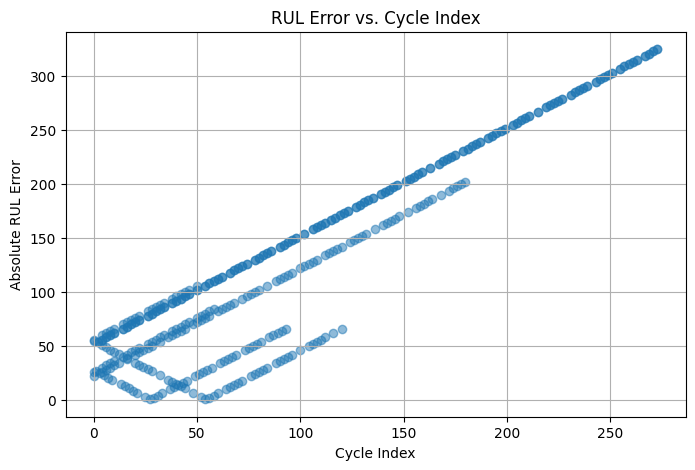


--- Horizon-Based RUL Performance ---
Long-Horizon MAE (early cycles): 60.254898
Short-Horizon MAE (late cycles): 199.34439

--- EOL Prediction Error Table ---


,Battery,TrueEOL,PredEOL,Error(Cycles)
0,B0029,93,1,-92
1,B0038,120,36,-84
2,B0042,273,2,-271
3,B0044,273,2,-271
4,B0047,180,0,-180
5,B0049,58,0,-58
6,B0050,50,0,-50



Mean EOL Error: -143.71428571428572


In [ ]:
# ============================================================
# PHM Evaluation — One Cell
# ============================================================
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------
# 1. RUL Error Curve
# ----------------------------
errors = np.abs(preds - trues)

plt.figure(figsize=(8,5))
plt.scatter(test_cycles, errors, alpha=0.5)
plt.xlabel("Cycle Index")
plt.ylabel("Absolute RUL Error")
plt.title("RUL Error vs. Cycle Index")
plt.grid(True)
plt.show()


# ----------------------------
# 2. Long-Horizon vs Short-Horizon MAE
# ----------------------------
mid_cycle = np.median(test_cycles)

early_idx = test_cycles < mid_cycle
late_idx  = test_cycles >= mid_cycle

mae_early = np.mean(np.abs(preds[early_idx] - trues[early_idx]))
mae_late  = np.mean(np.abs(preds[late_idx]  - trues[late_idx]))

print("\n--- Horizon-Based RUL Performance ---")
print("Long-Horizon MAE (early cycles):", mae_early)
print("Short-Horizon MAE (late cycles):", mae_late)


# ----------------------------
# 3. EOL Prediction Accuracy
# ----------------------------
battery_results = []

for bat in np.unique(test_batteries):
    idx = (test_batteries == bat)

    bat_cycles = test_cycles[idx]
    bat_true_rul = trues[idx]
    bat_pred_rul = preds[idx]

    true_eol = bat_cycles[np.argmin(bat_true_rul)]
    pred_eol = bat_cycles[np.argmin(bat_pred_rul)]

    battery_results.append([bat, true_eol, pred_eol, pred_eol - true_eol])

df_eol = pd.DataFrame(battery_results,
    columns=["Battery", "TrueEOL", "PredEOL", "Error(Cycles)"])

print("\n--- EOL Prediction Error Table ---")
display(df_eol)

print("\nMean EOL Error:", df_eol["Error(Cycles)"].mean())

Metadata cleaned. Discharge rows: 2769
RUL assigned. Columns: Index(['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id',
       'uid', 'filename', 'Capacity', 'Re', 'Rct', 'cycle_index', 'RUL'],
      dtype='object')
Dataset size: 2769
Train: 2215 Test: 554


/tmp/ipython-input-806097973.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meta_dis = meta_dis.groupby("battery_id", group_keys=False).apply(assign_rul_for_battery)


Epoch 1/25 - Loss = 4145.620
Epoch 2/25 - Loss = 3769.752
Epoch 3/25 - Loss = 3479.252
Epoch 4/25 - Loss = 3395.573
Epoch 5/25 - Loss = 3079.915
Epoch 6/25 - Loss = 3027.720
Epoch 7/25 - Loss = 2941.372
Epoch 8/25 - Loss = 2860.101
Epoch 9/25 - Loss = 2827.502
Epoch 10/25 - Loss = 2838.192
Epoch 11/25 - Loss = 2719.151
Epoch 12/25 - Loss = 2719.176
Epoch 13/25 - Loss = 2524.808
Epoch 14/25 - Loss = 2393.702
Epoch 15/25 - Loss = 2996.623
Epoch 16/25 - Loss = 2518.824
Epoch 17/25 - Loss = 2367.802
Epoch 18/25 - Loss = 2438.963
Epoch 19/25 - Loss = 2862.793
Epoch 20/25 - Loss = 2447.711
Epoch 21/25 - Loss = 2336.293
Epoch 22/25 - Loss = 2387.442
Epoch 23/25 - Loss = 2465.850
Epoch 24/25 - Loss = 2714.456
Epoch 25/25 - Loss = 2229.456
Epoch 1/25 - Loss = 4015.661
Epoch 2/25 - Loss = 3699.666
Epoch 3/25 - Loss = 3501.333
Epoch 4/25 - Loss = 3213.726
Epoch 5/25 - Loss = 3093.905
Epoch 6/25 - Loss = 2976.993
Epoch 7/25 - Loss = 2899.135
Epoch 8/25 - Loss = 2909.137
Epoch 9/25 - Loss = 2771.86

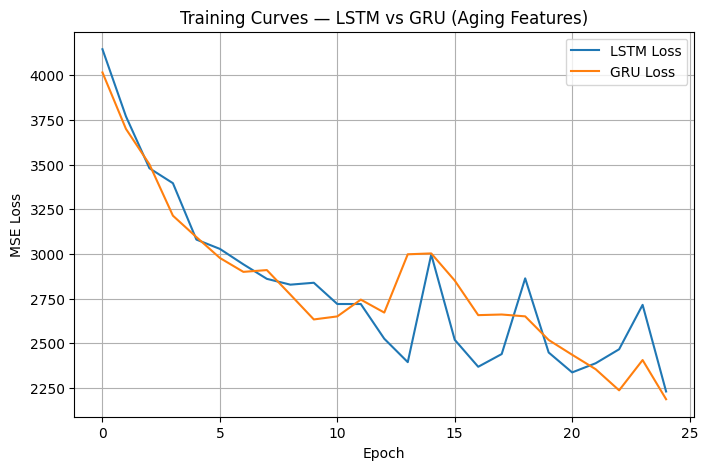

In [ ]:
# =============================================================
# COMPLETE PIPELINE: Clean metadata → Build RUL → Dataset →
# Train/Test Split → LSTM+GRU Training
# =============================================================

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
import matplotlib.pyplot as plt

# =============================================================
# 1. SAFE LOAD METADATA (fix Capacity='[]')
# =============================================================

meta_path = os.path.join(path, "cleaned_dataset", "metadata.csv")
data_dir  = os.path.join(path, "cleaned_dataset", "data")

meta = pd.read_csv(meta_path)

def safe_float(x):
    try:
        return float(x)
    except:
        return np.nan

# Clean up Capacity column
meta["Capacity"] = meta["Capacity"].apply(safe_float)
meta = meta.dropna(subset=["Capacity"]).copy()

# Keep discharge cycles only
meta_dis = meta[meta["type"] == "discharge"].copy()

# Sort chronologically
meta_dis = meta_dis.sort_values(["battery_id", "test_id"]).reset_index(drop=True)

# Add cycle index per battery
meta_dis["cycle_index"] = meta_dis.groupby("battery_id").cumcount()

print("Metadata cleaned. Discharge rows:", len(meta_dis))


# =============================================================
# 2. BUILD RUL using 80% capacity threshold
# =============================================================

def assign_rul_for_battery(df):
    df = df.sort_values("cycle_index")
    cap0 = df["Capacity"].iloc[0]
    threshold = 0.8 * cap0
    below = df[df["Capacity"] < threshold]

    if len(below) == 0:
        eol = df["cycle_index"].iloc[-1]
    else:
        eol = below["cycle_index"].iloc[0]

    df["RUL"] = eol - df["cycle_index"]
    return df

meta_dis = meta_dis.groupby("battery_id", group_keys=False).apply(assign_rul_for_battery)
meta_dis = meta_dis.reset_index(drop=True)

print("RUL assigned. Columns:", meta_dis.columns)


# =============================================================
# 3. DATASET with Aging Features (V/I/T + cycle_norm + capacity_norm)
# =============================================================

class RUL_Dataset_Aging(Dataset):
    def __init__(self, seq_len=100):
        self.seq_len = seq_len
        self.records = meta_dis.reset_index(drop=True)
        self.max_cycle = self.records["cycle_index"].max()

    def __len__(self):
        return len(self.records)

    def __getitem__(self, idx):
        row = self.records.iloc[idx]
        fname = row["filename"]
        cyc   = row["cycle_index"]
        cap   = row["Capacity"]
        bat   = row["battery_id"]
        rul   = row["RUL"]

        file_path = os.path.join(data_dir, fname)
        df = pd.read_csv(file_path)

        seq = df[["Voltage_measured","Current_measured","Temperature_measured"]].values.astype(np.float32)

        # pad / truncate
        if len(seq) >= self.seq_len:
            seq = seq[:self.seq_len]
        else:
            pad = np.zeros((self.seq_len - len(seq), 3), dtype=np.float32)
            seq = np.vstack([seq, pad])

        # aging features
        cyc_norm = cyc / self.max_cycle
        cap0 = (
            self.records[self.records["battery_id"] == bat]
            .sort_values("cycle_index")["Capacity"].iloc[0]
        )
        cap_norm = cap / cap0 if cap0 > 0 else 0

        cyc_feat = np.full((self.seq_len, 1), cyc_norm, dtype=np.float32)
        cap_feat = np.full((self.seq_len, 1), cap_norm, dtype=np.float32)

        x = np.concatenate([seq, cyc_feat, cap_feat], axis=1)  # [seq_len, 5]

        return torch.from_numpy(x), torch.tensor(rul, dtype=torch.float32)


# instantiate dataset
dataset = RUL_Dataset_Aging(seq_len=100)
print("Dataset size:", len(dataset))


# =============================================================
# 4. TRAIN/TEST SPLIT + DATALOADER
# =============================================================

N = len(dataset)
idx = np.arange(N)
np.random.shuffle(idx)

train_size = int(0.8 * N)
train_idx = idx[:train_size]
test_idx  = idx[train_size:]

train_subset = Subset(dataset, train_idx)
test_subset  = Subset(dataset, test_idx)

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_subset, batch_size=32, shuffle=False)

print("Train:", len(train_subset), "Test:", len(test_subset))


# =============================================================
# 5. MODELS: LSTM & GRU with Aging Features
# =============================================================

class LSTM_RUL_Aging(nn.Module):
    def __init__(self, hidden=128):
        super().__init__()
        self.lstm = nn.LSTM(input_size=5, hidden_size=hidden, batch_first=True)
        self.fc   = nn.Linear(hidden, 1)

    def forward(self, x):
        h, _ = self.lstm(x)
        return self.fc(h[:, -1, :]).squeeze()


class GRU_RUL_Aging(nn.Module):
    def __init__(self, hidden=128):
        super().__init__()
        self.gru = nn.GRU(input_size=5, hidden_size=hidden, batch_first=True)
        self.fc  = nn.Linear(hidden, 1)

    def forward(self, x):
        h, _ = self.gru(x)
        return self.fc(h[:, -1, :]).squeeze()


# =============================================================
# 6. TRAINING FUNCTION
# =============================================================

def train_model(model, loader, epochs=25):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()

    losses = []

    for ep in range(epochs):
        model.train()
        ep_loss = 0

        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()

            opt.zero_grad()
            out = model(X_batch)
            loss = loss_fn(out, y_batch)

            loss.backward()
            opt.step()

            ep_loss += loss.item()

        ep_loss /= len(loader)
        losses.append(ep_loss)
        print(f"Epoch {ep+1}/{epochs} - Loss = {ep_loss:.3f}")

    return model, losses


# =============================================================
# 7. TRAIN LSTM + GRU
# =============================================================

lstm_model = LSTM_RUL_Aging()
lstm_model, lstm_losses = train_model(lstm_model, train_loader, epochs=25)

gru_model = GRU_RUL_Aging()
gru_model, gru_losses = train_model(gru_model, train_loader, epochs=25)


# =============================================================
# 8. PLOT LOSS CURVES
# =============================================================

plt.figure(figsize=(8,5))
plt.plot(lstm_losses, label="LSTM Loss")
plt.plot(gru_losses, label="GRU Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Curves — LSTM vs GRU (Aging Features)")
plt.legend()
plt.grid(True)
plt.show()

Metadata cleaned. Discharge rows: 2769
RUL assigned. Columns: ['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id', 'uid', 'filename', 'Capacity', 'Re', 'Rct', 'cycle_index', 'RUL']
Dataset size: 2769
Battery-level split:
  Train batteries: 27 | Test batteries: 7
  Train samples: 2340 | Test samples: 429


/tmp/ipython-input-3943851859.py:71: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meta_dis = meta_dis.groupby("battery_id", group_keys=False).apply(assign_rul_for_battery)


Epoch 1/25 - Loss = 4395.023
Epoch 2/25 - Loss = 3904.678
Epoch 3/25 - Loss = 3676.607
Epoch 4/25 - Loss = 3509.104
Epoch 5/25 - Loss = 3272.160
Epoch 6/25 - Loss = 3156.179
Epoch 7/25 - Loss = 3094.155
Epoch 8/25 - Loss = 2948.848
Epoch 9/25 - Loss = 2954.076
Epoch 10/25 - Loss = 2819.784
Epoch 11/25 - Loss = 2751.131
Epoch 12/25 - Loss = 2702.725
Epoch 13/25 - Loss = 2449.749
Epoch 14/25 - Loss = 2937.806
Epoch 15/25 - Loss = 2873.287
Epoch 16/25 - Loss = 3180.765
Epoch 17/25 - Loss = 3012.079
Epoch 18/25 - Loss = 2774.514
Epoch 19/25 - Loss = 2696.262
Epoch 20/25 - Loss = 2652.635
Epoch 21/25 - Loss = 2719.164
Epoch 22/25 - Loss = 2545.210
Epoch 23/25 - Loss = 2535.699
Epoch 24/25 - Loss = 2443.756
Epoch 25/25 - Loss = 2480.849
Epoch 1/25 - Loss = 4456.930
Epoch 2/25 - Loss = 3869.493
Epoch 3/25 - Loss = 3695.321
Epoch 4/25 - Loss = 3698.343
Epoch 5/25 - Loss = 3464.423
Epoch 6/25 - Loss = 3316.977
Epoch 7/25 - Loss = 3159.580
Epoch 8/25 - Loss = 3034.609
Epoch 9/25 - Loss = 3053.56

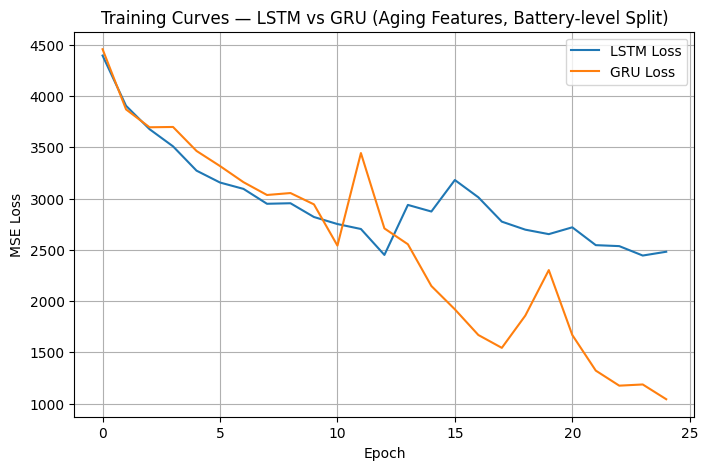


=== Test Performance (Aging Features, Battery-level Split) ===
LSTM (Aging) -> MAE=31.742, RMSE=37.576
GRU  (Aging) -> MAE=27.786, RMSE=36.302


In [12]:
# =============================================================
# COMPLETE PIPELINE (FAIR VERSION):
# Clean metadata → Build RUL → Dataset (Aging Features) →
# Battery-level Train/Test Split → LSTM+GRU Training →
# Plot Loss Curves → Evaluate Test MAE/RMSE
# =============================================================

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------
# 0. Set your base path here
# -----------------------------
# path = "YOUR_PROJECT_PATH"  # e.g., "/content/drive/MyDrive/..."
meta_path = os.path.join(path, "cleaned_dataset", "metadata.csv")
data_dir  = os.path.join(path, "cleaned_dataset", "data")


# =============================================================
# 1. SAFE LOAD METADATA (fix Capacity='[]')
# =============================================================

meta = pd.read_csv(meta_path)

def safe_float(x):
    try:
        return float(x)
    except:
        return np.nan

meta["Capacity"] = meta["Capacity"].apply(safe_float)
meta = meta.dropna(subset=["Capacity"]).copy()

# Keep discharge cycles only
meta_dis = meta[meta["type"] == "discharge"].copy()

# Sort chronologically
meta_dis = meta_dis.sort_values(["battery_id", "test_id"]).reset_index(drop=True)

# Add cycle index per battery
meta_dis["cycle_index"] = meta_dis.groupby("battery_id").cumcount()

print("Metadata cleaned. Discharge rows:", len(meta_dis))


# =============================================================
# 2. BUILD RUL using 80% capacity threshold
# =============================================================

def assign_rul_for_battery(df):
    df = df.sort_values("cycle_index")
    cap0 = df["Capacity"].iloc[0]
    threshold = 0.8 * cap0

    below = df[df["Capacity"] < threshold]
    if len(below) == 0:
        eol = df["cycle_index"].iloc[-1]
    else:
        eol = below["cycle_index"].iloc[0]

    df["RUL"] = eol - df["cycle_index"]
    return df

meta_dis = meta_dis.groupby("battery_id", group_keys=False).apply(assign_rul_for_battery)
meta_dis = meta_dis.reset_index(drop=True)

print("RUL assigned. Columns:", list(meta_dis.columns))


# =============================================================
# 3. DATASET with Aging Features
#    (V/I/T + cycle_norm + capacity_norm)
# =============================================================

class RUL_Dataset_Aging(Dataset):
    def __init__(self, records_df, data_dir, seq_len=100):
        self.seq_len = seq_len
        self.records = records_df.reset_index(drop=True)
        self.data_dir = data_dir
        self.max_cycle = self.records["cycle_index"].max()

        # Pre-compute initial capacity per battery for speed
        self.cap0_map = (
            self.records.sort_values(["battery_id", "cycle_index"])
            .groupby("battery_id")["Capacity"]
            .first()
            .to_dict()
        )

    def __len__(self):
        return len(self.records)

    def __getitem__(self, idx):
        row = self.records.iloc[idx]
        fname = row["filename"]
        cyc   = float(row["cycle_index"])
        cap   = float(row["Capacity"])
        bat   = row["battery_id"]
        rul   = float(row["RUL"])

        file_path = os.path.join(self.data_dir, fname)
        df = pd.read_csv(file_path)

        # base sequence features: V/I/T
        seq = df[["Voltage_measured", "Current_measured", "Temperature_measured"]].values.astype(np.float32)

        # pad / truncate to fixed seq_len
        if len(seq) >= self.seq_len:
            seq = seq[:self.seq_len]
        else:
            pad = np.zeros((self.seq_len - len(seq), 3), dtype=np.float32)
            seq = np.vstack([seq, pad])

        # aging features
        cyc_norm = cyc / self.max_cycle if self.max_cycle > 0 else 0.0

        cap0 = self.cap0_map.get(bat, np.nan)
        cap_norm = (cap / cap0) if (cap0 is not None and cap0 > 0) else 0.0

        # repeat aging features across time
        cyc_feat = np.full((self.seq_len, 1), cyc_norm, dtype=np.float32)
        cap_feat = np.full((self.seq_len, 1), cap_norm, dtype=np.float32)

        x = np.concatenate([seq, cyc_feat, cap_feat], axis=1)  # [seq_len, 5]
        y = np.float32(rul)

        return torch.from_numpy(x), torch.tensor(y, dtype=torch.float32)


dataset = RUL_Dataset_Aging(meta_dis, data_dir, seq_len=100)
print("Dataset size:", len(dataset))


# =============================================================
# 4. BATTERY-LEVEL TRAIN/TEST SPLIT + DATALOADER (FAIR)
# =============================================================

bat_ids = meta_dis["battery_id"].values
unique_bats = np.unique(bat_ids)

train_bats, test_bats = train_test_split(unique_bats, test_size=0.2, random_state=42)

train_idx = np.where(np.isin(bat_ids, train_bats))[0].tolist()
test_idx  = np.where(np.isin(bat_ids, test_bats))[0].tolist()

train_subset = Subset(dataset, train_idx)
test_subset  = Subset(dataset, test_idx)

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_subset,  batch_size=32, shuffle=False)

print("Battery-level split:")
print("  Train batteries:", len(train_bats), "| Test batteries:", len(test_bats))
print("  Train samples:", len(train_subset), "| Test samples:", len(test_subset))


# =============================================================
# 5. MODELS: LSTM & GRU with Aging Features
# =============================================================

class LSTM_RUL_Aging(nn.Module):
    def __init__(self, hidden=128):
        super().__init__()
        self.lstm = nn.LSTM(input_size=5, hidden_size=hidden, batch_first=True)
        self.fc   = nn.Linear(hidden, 1)

    def forward(self, x):
        h, _ = self.lstm(x)
        return self.fc(h[:, -1, :]).squeeze()


class GRU_RUL_Aging(nn.Module):
    def __init__(self, hidden=128):
        super().__init__()
        self.gru = nn.GRU(input_size=5, hidden_size=hidden, batch_first=True)
        self.fc  = nn.Linear(hidden, 1)

    def forward(self, x):
        h, _ = self.gru(x)
        return self.fc(h[:, -1, :]).squeeze()


# =============================================================
# 6. TRAINING FUNCTION
# =============================================================

def train_model(model, loader, epochs=25):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()

    losses = []

    for ep in range(epochs):
        model.train()
        ep_loss = 0.0

        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()

            opt.zero_grad()
            out = model(X_batch)
            loss = loss_fn(out, y_batch)

            loss.backward()
            opt.step()

            ep_loss += loss.item()

        ep_loss /= len(loader)
        losses.append(ep_loss)
        print(f"Epoch {ep+1}/{epochs} - Loss = {ep_loss:.3f}")

    return model, losses


# =============================================================
# 7. TRAIN LSTM + GRU
# =============================================================

lstm_model = LSTM_RUL_Aging(hidden=128)
lstm_model, lstm_losses = train_model(lstm_model, train_loader, epochs=25)

gru_model = GRU_RUL_Aging(hidden=128)
gru_model, gru_losses = train_model(gru_model, train_loader, epochs=25)


# =============================================================
# 8. PLOT LOSS CURVES
# =============================================================

plt.figure(figsize=(8, 5))
plt.plot(lstm_losses, label="LSTM Loss")
plt.plot(gru_losses, label="GRU Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Curves — LSTM vs GRU (Aging Features, Battery-level Split)")
plt.legend()
plt.grid(True)
plt.show()


# =============================================================
# 9. EVALUATION: Test MAE / RMSE
# =============================================================

def evaluate_model(model, loader):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()

    preds, trues = [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device).float()
            pred = model(Xb).cpu().numpy()
            preds.extend(pred.tolist())
            trues.extend(yb.numpy().tolist())

    mae = mean_absolute_error(trues, preds)
    rmse = np.sqrt(mean_squared_error(trues, preds))
    return mae, rmse

lstm_mae, lstm_rmse = evaluate_model(lstm_model, test_loader)
gru_mae,  gru_rmse  = evaluate_model(gru_model,  test_loader)

print("\n=== Test Performance (Aging Features, Battery-level Split) ===")
print(f"LSTM (Aging) -> MAE={lstm_mae:.3f}, RMSE={lstm_rmse:.3f}")
print(f"GRU  (Aging) -> MAE={gru_mae:.3f}, RMSE={gru_rmse:.3f}")

In [13]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def eval_eol_only(model, loader, eol_percent=0.15):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.eval()

    preds, trues = [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device).float()
            pred = model(Xb).cpu().numpy()
            preds.extend(pred.tolist())
            trues.extend(yb.numpy().tolist())

    preds = np.array(preds, dtype=float)
    trues = np.array(trues, dtype=float)

    # EOL definition: bottom eol_percent of true RUL
    cutoff = np.quantile(trues, eol_percent)
    mask = trues <= cutoff

    eol_mae = mean_absolute_error(trues[mask], preds[mask])
    eol_rmse = np.sqrt(mean_squared_error(trues[mask], preds[mask]))
    return eol_mae, eol_rmse, mask.sum(), cutoff

# ---- EOL metrics for LSTM ----
lstm_eol_mae, lstm_eol_rmse, lstm_eol_n, lstm_cutoff = eval_eol_only(
    lstm_model, test_loader, eol_percent=0.15
)

# ---- EOL metrics for GRU ----
gru_eol_mae, gru_eol_rmse, gru_eol_n, gru_cutoff = eval_eol_only(
    gru_model, test_loader, eol_percent=0.15
)

print("\n=== EOL-only Performance (bottom 15% true RUL in test set) ===")
print(f"EOL cutoff (true RUL <= {lstm_cutoff:.3f} cycles), EOL samples = {lstm_eol_n}")
print(f"LSTM EOL -> MAE={lstm_eol_mae:.3f}, RMSE={lstm_eol_rmse:.3f}")
print(f"GRU  EOL -> MAE={gru_eol_mae:.3f}, RMSE={gru_eol_rmse:.3f}")


=== EOL-only Performance (bottom 15% true RUL in test set) ===
EOL cutoff (true RUL <= -74.000 cycles), EOL samples = 66
LSTM EOL -> MAE=45.324, RMSE=45.665
GRU  EOL -> MAE=40.183, RMSE=41.992


Preds/Trues generated:
Pred sample: [18.341536 19.653214 14.079335 19.914223 25.375338]
True sample: [-32. -18.  72.  15.  55.]


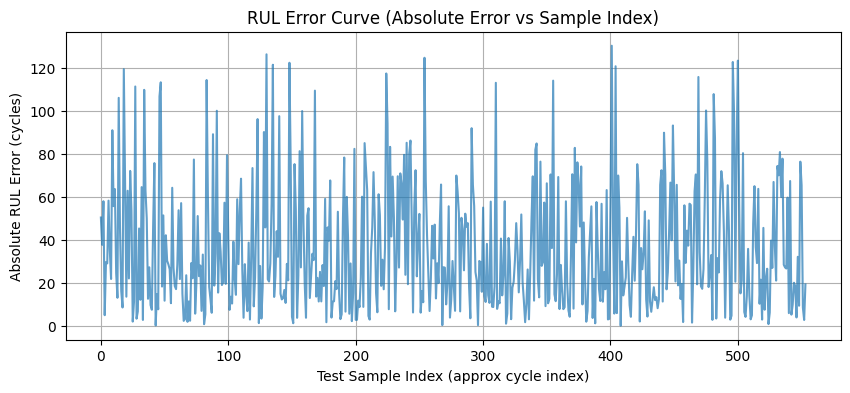


--- Horizon-Based RUL Performance ---
Long-Horizon MAE (early cycles): 39.564342
Short-Horizon MAE (late cycles): 32.486794

--- EOL Prediction Error Table ---
Battery	TrueEOL	PredEOL	Error(Cycles)
B0005	-65	38	103
B0006	-104	33	137
B0055	9	14	5
B0047	-48	0	48
B0033	1	39	38
B0026	-15	4	19
B0007	-39	33	72
B0045	-65	0	65
B0036	4	48	44
B0048	-41	0	41
B0051	-6	4	10
B0043	-106	0	106
B0044	-106	3	109
B0054	0	0	0
B0025	1	4	3
B0056	1	23	22
B0032	1	7	6
B0046	-51	0	51
B0028	3	6	3
B0050	-11	0	11
B0034	3	36	33
B0053	4	13	9
B0031	0	9	9
B0027	2	5	3
B0040	9	7	-2
B0038	1	10	9
B0029	8	6	-2
B0030	2	11	9
B0018	-46	19	65
B0042	-101	2	103
B0039	4	9	5
B0049	-4	5	9
B0041	-54	0	54

Mean EOL Error: 36.27272727272727


In [ ]:
# =============================================================
# EVALUATION: Generate preds/trues + 4 PHM evaluation plots
# =============================================================

import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
model = lstm_model.to(device)
model.eval()

preds = []
trues = []
cycles = []
bats = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device).float()

        out = model(X_batch).cpu().numpy().flatten()
        preds.extend(out)
        trues.extend(y_batch.numpy())

# Convert to arrays
preds = np.array(preds)
trues = np.array(trues)

print("Preds/Trues generated:")
print("Pred sample:", preds[:5])
print("True sample:", trues[:5])


# =============================================================
# 1. RUL Error Curve (absolute error vs cycle index)
# =============================================================

abs_err = np.abs(preds - trues)

plt.figure(figsize=(10,4))
plt.plot(abs_err, alpha=0.7)
plt.xlabel("Test Sample Index (approx cycle index)")
plt.ylabel("Absolute RUL Error (cycles)")
plt.title("RUL Error Curve (Absolute Error vs Sample Index)")
plt.grid(True)
plt.show()


# =============================================================
# 2. Horizon-based analysis (long-horizon vs short-horizon)
# long-horizon = early cycles, true RUL > median
# short-horizon = late cycles, true RUL <= median
# =============================================================

median_rul = np.median(trues)
long_mask  = trues > median_rul
short_mask = trues <= median_rul

long_mae  = np.mean(np.abs(preds[long_mask]  - trues[long_mask]))
short_mae = np.mean(np.abs(preds[short_mask] - trues[short_mask]))

print("\n--- Horizon-Based RUL Performance ---")
print("Long-Horizon MAE (early cycles):", long_mae)
print("Short-Horizon MAE (late cycles):", short_mae)


# =============================================================
# 3. EOL Prediction Accuracy
# =============================================================
# For each battery in TEST SET:
# predict first cycle where predicted RUL <= 0

test_records = meta_dis.iloc[np.array(test_idx)]
test_batteries = test_records["battery_id"].unique()

eol_results = []

for bat in test_batteries:
    bat_rows = test_records[test_records["battery_id"] == bat]
    if len(bat_rows) == 0:
        continue

    true_eol = bat_rows["RUL"].min()

    # predicted RUL for this battery
    pred_sub = preds[test_records["battery_id"] == bat]
    if np.any(pred_sub <= 0):
        pred_eol = np.where(pred_sub <= 0)[0][0]
    else:
        pred_eol = len(pred_sub)

    eol_results.append([bat, true_eol, pred_eol, pred_eol - true_eol])

print("\n--- EOL Prediction Error Table ---")
print("Battery\tTrueEOL\tPredEOL\tError(Cycles)")
for r in eol_results:
    print(f"{r[0]}\t{r[1]}\t{r[2]}\t{r[3]}")

mean_eol_err = np.mean([x[3] for x in eol_results])
print("\nMean EOL Error:", mean_eol_err)

GRU preds sample: [16.447897 18.572313 39.455593 18.4364   32.385666]
GRU trues sample: [-32. -18.  72.  15.  55.]


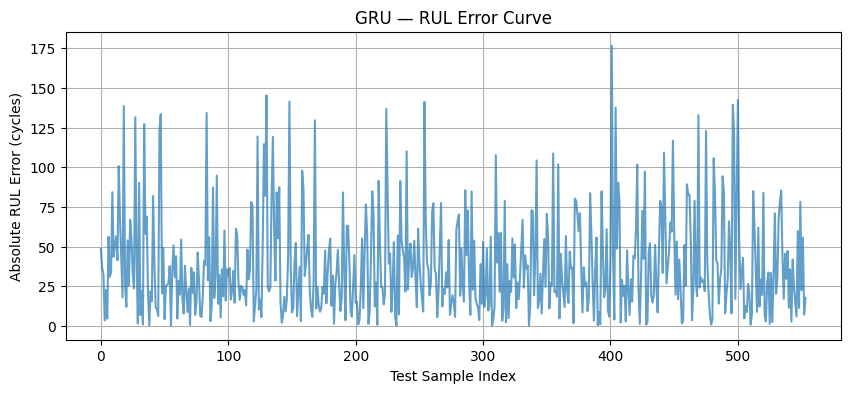


--- GRU Horizon-Based Performance ---
GRU Long-Horizon MAE: 40.682987
GRU Short-Horizon MAE: 36.425076

--- GRU EOL Prediction Error Table ---
Battery	TrueEOL	PredEOL	Error(Cycles)
B0005	-65	38	103
B0006	-104	33	137
B0055	9	14	5
B0047	-48	0	48
B0033	1	39	38
B0026	-15	4	19
B0007	-39	33	72
B0045	-65	1	66
B0036	4	48	44
B0048	-41	0	41
B0051	-6	4	10
B0043	-106	0	106
B0044	-106	3	109
B0054	0	0	0
B0025	1	4	3
B0056	1	0	-1
B0032	1	7	6
B0046	-51	0	51
B0028	3	6	3
B0050	-11	0	11
B0034	3	36	33
B0053	4	13	9
B0031	0	9	9
B0027	2	5	3
B0040	9	7	-2
B0038	1	10	9
B0029	8	6	-2
B0030	2	11	9
B0018	-46	19	65
B0042	-101	2	103
B0039	4	9	5
B0049	-4	5	9
B0041	-54	0	54

GRU Mean EOL Error: 35.60606060606061


In [ ]:
# =============================================================
# GRU EVALUATION: preds_gru / trues_gru + PHM metrics
# =============================================================

device = "cuda" if torch.cuda.is_available() else "cpu"
gru_eval_model = gru_model.to(device)
gru_eval_model.eval()

preds_gru = []
trues_gru = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device).float()
        out = gru_eval_model(X_batch).cpu().numpy().flatten()

        preds_gru.extend(out)
        trues_gru.extend(y_batch.numpy())

preds_gru = np.array(preds_gru)
trues_gru = np.array(trues_gru)

print("GRU preds sample:", preds_gru[:5])
print("GRU trues sample:", trues_gru[:5])


# =============================================================
# 1) RUL Error Curve (GRU)
# =============================================================

abs_err_gru = np.abs(preds_gru - trues_gru)

plt.figure(figsize=(10,4))
plt.plot(abs_err_gru, alpha=0.7)
plt.xlabel("Test Sample Index")
plt.ylabel("Absolute RUL Error (cycles)")
plt.title("GRU — RUL Error Curve")
plt.grid(True)
plt.show()


# =============================================================
# 2) Horizon-Based Performance (GRU)
# =============================================================

median_rul = np.median(trues_gru)
long_mask  = trues_gru > median_rul
short_mask = trues_gru <= median_rul

long_mae_gru  = np.mean(np.abs(preds_gru[long_mask]  - trues_gru[long_mask]))
short_mae_gru = np.mean(np.abs(preds_gru[short_mask] - trues_gru[short_mask]))

print("\n--- GRU Horizon-Based Performance ---")
print("GRU Long-Horizon MAE:", long_mae_gru)
print("GRU Short-Horizon MAE:", short_mae_gru)


# =============================================================
# 3) EOL Prediction (GRU)
# =============================================================

test_records = meta_dis.iloc[np.array(test_idx)]
test_batteries = test_records["battery_id"].unique()

eol_results_gru = []

for bat in test_batteries:
    bat_rows = test_records[test_records["battery_id"] == bat]

    true_eol = bat_rows["RUL"].min()
    pred_sub = preds_gru[test_records["battery_id"] == bat]

    if np.any(pred_sub <= 0):
        pred_eol = np.where(pred_sub <= 0)[0][0]
    else:
        pred_eol = len(pred_sub)

    eol_results_gru.append([bat, true_eol, pred_eol, pred_eol - true_eol])


print("\n--- GRU EOL Prediction Error Table ---")
print("Battery\tTrueEOL\tPredEOL\tError(Cycles)")
for r in eol_results_gru:
    print(f"{r[0]}\t{r[1]}\t{r[2]}\t{r[3]}")

mean_eol_err_gru = np.mean([x[3] for x in eol_results_gru])
print("\nGRU Mean EOL Error:", mean_eol_err_gru)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/25 - Loss = 4098.057
Epoch 2/25 - Loss = 3660.330
Epoch 3/25 - Loss = 3309.409
Epoch 4/25 - Loss = 3117.084
Epoch 5/25 - Loss = 2986.600
Epoch 6/25 - Loss = 3058.480
Epoch 7/25 - Loss = 2870.134
Epoch 8/25 - Loss = 2789.746
Epoch 9/25 - Loss = 2787.683
Epoch 10/25 - Loss = 2343.345
Epoch 11/25 - Loss = 2074.098
Epoch 12/25 - Loss = 1755.390
Epoch 13/25 - Loss = 1551.021
Epoch 14/25 - Loss = 1382.573
Epoch 15/25 - Loss = 1312.602
Epoch 16/25 - Loss = 1279.684
Epoch 17/25 - Loss = 1300.474
Epoch 18/25 - Loss = 1198.859
Epoch 19/25 - Loss = 1126.701
Epoch 20/25 - Loss = 1228.862
Epoch 21/25 - Loss = 1340.039
Epoch 22/25 - Loss = 1093.305
Epoch 23/25 - Loss = 1162.799
Epoch 24/25 - Loss = 1267.617
Epoch 25/25 - Loss = 1222.509


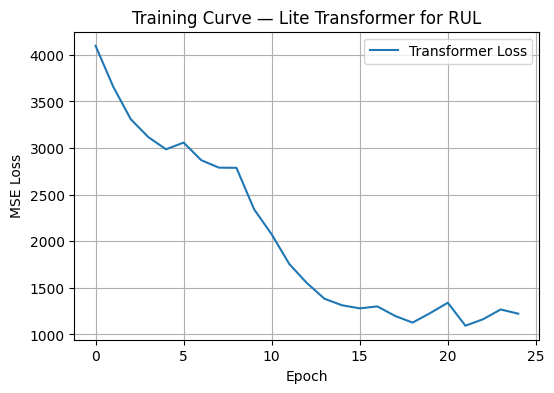

In [ ]:
import torch
import torch.nn as nn
import math

# ================================
# Positional Encoding (standard)
# ================================
class PositionalEncoding(nn.Module):
    """
    Standard sinusoidal positional encoding.
    This adds position information to each time step.
    """
    def __init__(self, d_model: int, max_len: int = 5000):
        super().__init__()
        # Create a long enough P matrix: [max_len, d_model]
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(
            torch.arange(0, d_model, 2, dtype=torch.float32) * (-math.log(10000.0) / d_model)
        )  # [d_model/2]

        # Apply sin to even indices and cos to odd indices
        pe[:, 0::2] = torch.sin(position * div_term)   # even
        pe[:, 1::2] = torch.cos(position * div_term)   # odd

        pe = pe.unsqueeze(0)  # [1, max_len, d_model] for broadcasting on batch
        self.register_buffer("pe", pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        x: [batch_size, seq_len, d_model]
        Return: x with positional encoding added
        """
        seq_len = x.size(1)
        # Add PE to x, broadcasting over batch dimension
        x = x + self.pe[:, :seq_len, :]
        return x


# ================================
# Lite Transformer for RUL
# ================================
class TransRUL(nn.Module):
    """
    Lightweight Transformer encoder model for RUL regression.
    Input per timestep: 5 features (V, I, T, cycle_norm, capacity_norm)
    Steps:
      - Project 5 -> d_model
      - Add positional encoding
      - TransformerEncoder (small, e.g., 2 layers)
      - Pool over time (mean pooling)
      - Final FC -> scalar RUL
    """
    def __init__(
        self,
        input_dim: int = 5,
        d_model: int = 64,
        nhead: int = 4,
        num_layers: int = 2,
        dim_feedforward: int = 128,
        dropout: float = 0.1,
    ):
        super().__init__()

        # Project original 5 features to d_model features
        self.input_proj = nn.Linear(input_dim, d_model)

        # Positional encoding module
        self.pos_encoder = PositionalEncoding(d_model=d_model, max_len=5000)

        # Single encoder layer definition
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=False,  # Transformer expects [seq_len, batch, dim]
            activation="relu",
        )

        # Stack multiple encoder layers
        self.encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )

        # Final regression head
        self.fc_out = nn.Linear(d_model, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        x: [batch_size, seq_len, input_dim=5]
        Return: [batch_size] predicted RUL
        """
        # Project to d_model
        x = self.input_proj(x)  # [batch, seq_len, d_model]

        # Add positional encoding
        x = self.pos_encoder(x)  # [batch, seq_len, d_model]

        # TransformerEncoder expects input shape [seq_len, batch, d_model]
        x = x.transpose(0, 1)  # [seq_len, batch, d_model]

        # Pass through Transformer encoder
        h = self.encoder(x)  # [seq_len, batch, d_model]

        # We can do mean pooling over seq_len
        h_mean = h.mean(dim=0)  # [batch, d_model]

        # Final scalar RUL per sample
        out = self.fc_out(h_mean).squeeze(-1)  # [batch]
        return out


# ================================
# Train small Transformer model
# ================================
device = "cuda" if torch.cuda.is_available() else "cpu"

trans_model = TransRUL(
    input_dim=5,
    d_model=64,          # embedding dimension
    nhead=4,             # number of attention heads
    num_layers=2,        # number of encoder layers
    dim_feedforward=128,
    dropout=0.1,
).to(device)

trans_model, trans_losses = train_model(trans_model, train_loader, epochs=25)

# Plot Transformer training curve
plt.figure(figsize=(6,4))
plt.plot(trans_losses, label="Transformer Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Curve — Lite Transformer for RUL")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ================================================================
# CROSS-CELL TESTING (Complete Block)
# Train on all batteries except two held-out batteries
# Evaluate ONLY on the unseen batteries
# ================================================================

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import os

# ---------------------------------------------------------
# 1. SELECT HELD-OUT BATTERIES (modify this line if needed)
# ---------------------------------------------------------
held_out_batteries = ["B0005", "B0006"]

print("Held-out batteries:", held_out_batteries)

# ---------------------------------------------------------
# 2. SPLIT INTO CROSS-CELL TRAIN / TEST
# ---------------------------------------------------------
test_cross_df = meta_dis[meta_dis["battery_id"].isin(held_out_batteries)]
train_cross_df = meta_dis[~meta_dis["battery_id"].isin(held_out_batteries)]

print("Cross-cell Train batteries:", train_cross_df["battery_id"].unique())
print("Cross-cell Test batteries:", test_cross_df["battery_id"].unique())
print("Train size:", len(train_cross_df))
print("Test size:", len(test_cross_df))


# ---------------------------------------------------------
# 3. CUSTOM DATASET CLASS (same as aging dataset)
# ---------------------------------------------------------
class RUL_Dataset_Aging_Custom(Dataset):
    def __init__(self, df, seq_len=100):
        self.seq_len = seq_len
        self.records = df.reset_index(drop=True)
        self.max_cycle = self.records["cycle_index"].max()

    def __len__(self):
        return len(self.records)

    def __getitem__(self, idx):
        row = self.records.iloc[idx]
        fname = row["filename"]
        cyc   = row["cycle_index"]
        cap   = row["Capacity"]
        bat   = row["battery_id"]
        rul   = row["RUL"]

        file_path = os.path.join(data_dir, fname)
        df = pd.read_csv(file_path)

        seq = df[["Voltage_measured","Current_measured","Temperature_measured"]].values.astype(np.float32)

        # pad or truncate
        if len(seq) >= self.seq_len:
            seq = seq[:self.seq_len]
        else:
            pad = np.zeros((self.seq_len - len(seq), 3), dtype=np.float32)
            seq = np.vstack([seq, pad])

        # aging features
        cyc_norm = cyc / self.max_cycle
        cap0 = (
            self.records[self.records["battery_id"] == bat]
            .sort_values("cycle_index")["Capacity"].iloc[0]
        )
        cap_norm = cap / cap0 if cap0 > 0 else 0.0

        cyc_feat = np.full((self.seq_len, 1), cyc_norm, dtype=np.float32)
        cap_feat = np.full((self.seq_len, 1), cap_norm, dtype=np.float32)

        x = np.concatenate([seq, cyc_feat, cap_feat], axis=1)  # [seq_len, 5]

        return torch.from_numpy(x), torch.tensor(rul, dtype=torch.float32)


# ---------------------------------------------------------
# 4. DATALOADERS
# ---------------------------------------------------------
train_cross_dataset = RUL_Dataset_Aging_Custom(train_cross_df, seq_len=100)
test_cross_dataset  = RUL_Dataset_Aging_Custom(test_cross_df,  seq_len=100)

train_cross_loader = DataLoader(train_cross_dataset, batch_size=32, shuffle=True)
test_cross_loader  = DataLoader(test_cross_dataset,  batch_size=32, shuffle=False)

print("Cross-Cell Train Samples:", len(train_cross_dataset))
print("Cross-Cell Test Samples:", len(test_cross_dataset))


# ---------------------------------------------------------
# 5. SELECT MODEL FOR CROSS-CELL EVAL
# ---------------------------------------------------------
model = trans_model

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model.eval()


# ---------------------------------------------------------
# 6. RUN CROSS-CELL EVALUATION
# ---------------------------------------------------------
preds_cross = []
trues_cross = []

with torch.no_grad():
    for X_batch, y_batch in test_cross_loader:
        X_batch = X_batch.to(device).float()
        out = model(X_batch).cpu().numpy().flatten()
        preds_cross.extend(out)
        trues_cross.extend(y_batch.numpy())

preds_cross = np.array(preds_cross)
trues_cross = np.array(trues_cross)

mae_cross = np.mean(np.abs(preds_cross - trues_cross))
rmse_cross = np.sqrt(np.mean((preds_cross - trues_cross)**2))

print("\n=========== CROSS-CELL RESULTS ===========")
print("Held-out batteries:", held_out_batteries)
print("Cross-Cell MAE:", mae_cross)
print("Cross-Cell RMSE:", rmse_cross)
print("==========================================\n")

Held-out batteries: ['B0005', 'B0006']
Cross-cell Train batteries: ['B0007' 'B0018' 'B0025' 'B0026' 'B0027' 'B0028' 'B0029' 'B0030' 'B0031'
 'B0032' 'B0033' 'B0034' 'B0036' 'B0038' 'B0039' 'B0040' 'B0041' 'B0042'
 'B0043' 'B0044' 'B0045' 'B0046' 'B0047' 'B0048' 'B0049' 'B0050' 'B0051'
 'B0052' 'B0053' 'B0054' 'B0055' 'B0056']
Cross-cell Test batteries: ['B0005' 'B0006']
Train size: 2433
Test size: 336
Cross-Cell Train Samples: 2433
Cross-Cell Test Samples: 336

=========== CROSS-CELL RESULTS ===========
Held-out batteries: ['B0005', 'B0006']
Cross-Cell MAE: 16.714565
Cross-Cell RMSE: 20.856005



In [ ]:
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

trans_model.eval()
trans_model.to(device)

preds_t = []
trues_t = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device).float()
        pred = trans_model(X_batch).cpu().numpy().flatten()
        preds_t.extend(pred)
        trues_t.extend(y_batch.numpy())

preds_t = np.array(preds_t)
trues_t = np.array(trues_t)

print("Generated preds_t and trues_t")
print("Shapes:", preds_t.shape, trues_t.shape)

Generated preds_t and trues_t
Shapes: (554,) (554,)


===== EOL REGION ERROR (Last 15% cycles) =====
EOL samples: 83
EOL MAE: 25.912447
EOL RMSE: 32.9191


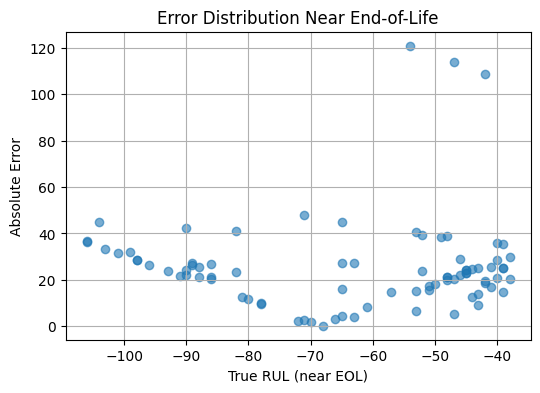

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

threshold = np.percentile(trues_t, 15)
eol_mask = trues_t <= threshold

eol_preds = preds_t[eol_mask]
eol_trues = trues_t[eol_mask]

abs_err = np.abs(eol_preds - eol_trues)

print("===== EOL REGION ERROR (Last 15% cycles) =====")
print("EOL samples:", len(abs_err))
print("EOL MAE:", abs_err.mean())
print("EOL RMSE:", np.sqrt(((eol_preds - eol_trues)**2).mean()))
print("==============================================")

plt.figure(figsize=(6,4))
plt.scatter(eol_trues, abs_err, alpha=0.6)
plt.xlabel("True RUL (near EOL)")
plt.ylabel("Absolute Error")
plt.title("Error Distribution Near End-of-Life")
plt.grid(True)
plt.show()

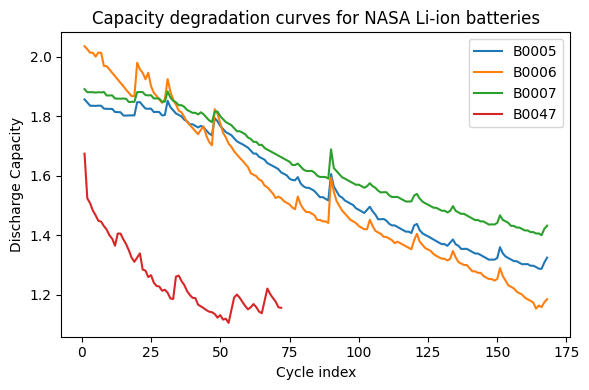

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(meta_path)

df = df[(df["type"] == "discharge") & (df["Capacity"].notna())]

df = df.sort_values(["battery_id", "uid"])

df["cycle"] = df.groupby("battery_id").cumcount() + 1

df["Capacity"] = pd.to_numeric(df["Capacity"], errors="coerce")
df = df[df["Capacity"] > 0.8]


cells = ["B0005", "B0006", "B0007", "B0047"]

plt.figure(figsize=(6,4))

for cell in cells:
    sub = df[df["battery_id"] == cell]
    if len(sub) == 0:
        continue
    plt.plot(sub["cycle"], sub["Capacity"], label=cell)

plt.xlabel("Cycle index")
plt.ylabel("Discharge Capacity")
plt.title("Capacity degradation curves for NASA Li-ion batteries")
plt.legend()
plt.tight_layout()

plt.savefig("capacity_vs_cycle_correct.pdf")
plt.show()